<a href="https://colab.research.google.com/github/ArtistDeveloper/TensorFlow/blob/master/MNIST_Dense_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import keras
keras.__version__

'2.3.1'

In [65]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print train_images.shape, train_labels

(60000, 28, 28) [5 0 4 ... 5 6 8]


In [66]:
print(train_images.shape) #shape => 28 * 28이미지가 6만장있다.

(60000, 28, 28)


In [67]:
print len(train_labels), train_images.shape[0]
a, b, c = train_images.shape
print a, b, c

60000 60000
60000 28 28


In [68]:
train_labels[0]

5

In [69]:
test_images.shape

(10000, 28, 28)

In [70]:
len(test_labels)

10000

In [71]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

0


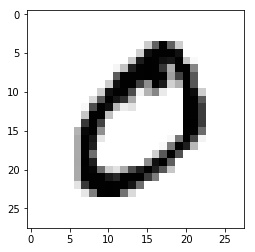

In [72]:
import matplotlib.pyplot as plt
digit = train_images[1]
print train_labels[1]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [73]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [74]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [75]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [76]:
train_labels[0]

5

In [77]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [78]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [79]:
network.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [80]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 5s 82us/step - loss: 0.2553 - accuracy: 0.9272
Epoch 2/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.1034 - accuracy: 0.9696
Epoch 3/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.0683 - accuracy: 0.9794
Epoch 4/5
60000/60000 [==============================] - 6s 92us/step - loss: 0.0493 - accuracy: 0.9847
Epoch 5/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.0370 - accuracy: 0.9888


In [81]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 58us/step


In [82]:
print('test_acc:', test_acc)

('test_acc:', 0.9776999950408936)


In [83]:
#Predict = FeedForward
prediction = network.predict(test_images)

In [84]:
import numpy as np

In [85]:
prediction[0]

array([8.3699030e-09, 2.4605333e-09, 2.6804873e-06, 7.4305409e-04,
       1.0789992e-12, 9.3488893e-08, 5.1417438e-14, 9.9925226e-01,
       2.1186723e-07, 1.5185161e-06], dtype=float32)

In [86]:
np.max(prediction[0])

0.99925226

In [87]:
np.argmax(prediction[0])

7

In [ ]:
import matplotlib.pyplot as plt
# test_images[0]: (784,) -> (28, 28)